## Note:
#### To do exploratory data analysis i used semi-auto ML utilility application made by me  
####  APP Link https://share.streamlit.io/kartikay-99k/eda-and-data-preprocessing-app/main/app.py
#### Repo Link   https://github.com/kartikay-99k/EDA-and-Data-Preprocessing-app      


#### Please go through Comments above codes for better understanding

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
df.head()

,ID,LICENSE_ID,ACCOUNT_NUMBER,SITE_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,...,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_APPROVED_FOR_ISSUANCE,DATE_ISSUED,LICENSE_STATUS_CHANGE_DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE_STATUS
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623,...,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,NaN,25.0,41.843613,-87.714618,"{'latitude': '41.843612879431845', 'longitude'...",AAI
1,1358463-20051116,1639294,262311,29,"ISLA_TROPICAL,_INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,60618,...,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,2006-06-15T00:00:00,60.0,41.961132,-87.699626,"{'latitude': '41.96113244107215', 'longitude':...",AAC
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,60035,...,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,60439,...,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,60087,...,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85895 entries, 0 to 85894
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 85895 non-null  object 
 1   LICENSE_ID                         85895 non-null  int64  
 2   ACCOUNT_NUMBER                     85895 non-null  int64  
 3   SITE_NUMBER                        85895 non-null  int64  
 4   LEGAL_NAME                         85895 non-null  object 
 5   DOING_BUSINESS_AS_NAME             85894 non-null  object 
 6   ADDRESS                            85895 non-null  object 
 7   CITY                               85895 non-null  object 
 8   STATE                              85895 non-null  object 
 9   ZIP_CODE                           85864 non-null  object 
 10  WARD                               36194 non-null  float64
 11  PRECINCT                           29194 non-null  flo

In [3]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57239 entries, 0 to 57238
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 57239 non-null  object 
 1   LICENSE_ID                         57239 non-null  int64  
 2   ACCOUNT_NUMBER                     57239 non-null  int64  
 3   SITE_NUMBER                        57239 non-null  int64  
 4   LEGAL_NAME                         57239 non-null  object 
 5   DOING_BUSINESS_AS_NAME             57237 non-null  object 
 6   ADDRESS                            57239 non-null  object 
 7   CITY                               57239 non-null  object 
 8   STATE                              57239 non-null  object 
 9   ZIP_CODE                           57227 non-null  float64
 10  WARD                               56613 non-null  float64
 11  PRECINCT                           55661 non-null  flo

In [4]:
df.isnull().sum()

ID                                       0
LICENSE_ID                               0
ACCOUNT_NUMBER                           0
SITE_NUMBER                              0
LEGAL_NAME                               0
DOING_BUSINESS_AS_NAME                   1
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP_CODE                                31
WARD                                 49701
PRECINCT                             56701
WARD_PRECINCT                        49700
POLICE_DISTRICT                      54012
LICENSE_CODE                             0
LICENSE_DESCRIPTION                      0
LICENSE_NUMBER                           1
APPLICATION_TYPE                         0
APPLICATION_CREATED_DATE             64660
APPLICATION_REQUIREMENTS_COMPLETE        0
PAYMENT_DATE                          1289
CONDITIONAL_APPROVAL                     0
LICENSE_TERM_START_DATE                228
LICENSE_TER

In [5]:
df_test.isnull().sum()

ID                                       0
LICENSE_ID                               0
ACCOUNT_NUMBER                           0
SITE_NUMBER                              0
LEGAL_NAME                               0
DOING_BUSINESS_AS_NAME                   2
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP_CODE                                12
WARD                                   626
PRECINCT                              1578
WARD_PRECINCT                          616
POLICE_DISTRICT                       1475
LICENSE_CODE                             0
LICENSE_DESCRIPTION                      0
LICENSE_NUMBER                           0
APPLICATION_TYPE                         0
APPLICATION_CREATED_DATE             44587
APPLICATION_REQUIREMENTS_COMPLETE        0
PAYMENT_DATE                          1051
CONDITIONAL_APPROVAL                     0
LICENSE_TERM_START_DATE                118
LICENSE_TER

## Dropping the columns which are having **High Cardinality**  and other irrelevant columns    


In [6]:
df.drop( ['LICENSE_ID','ACCOUNT_NUMBER','SITE_NUMBER','LEGAL_NAME','DOING_BUSINESS_AS_NAME','ADDRESS','CITY','ZIP_CODE','WARD','WARD_PRECINCT','PRECINCT','POLICE_DISTRICT','LOCATION','LICENSE_NUMBER','SSA','LATITUDE','LONGITUDE'] ,axis=1,inplace=True)
df_test.drop( ['LICENSE_ID','ACCOUNT_NUMBER','SITE_NUMBER','LEGAL_NAME','DOING_BUSINESS_AS_NAME','ADDRESS','CITY','ZIP_CODE','WARD','WARD_PRECINCT','PRECINCT','POLICE_DISTRICT','LOCATION','LICENSE_NUMBER','SSA','LATITUDE','LONGITUDE'] ,axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85895 entries, 0 to 85894
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   ID                                 85895 non-null  object
 1   STATE                              85895 non-null  object
 2   LICENSE_CODE                       85895 non-null  int64 
 3   LICENSE_DESCRIPTION                85895 non-null  object
 4   APPLICATION_TYPE                   85895 non-null  object
 5   APPLICATION_CREATED_DATE           21235 non-null  object
 6   APPLICATION_REQUIREMENTS_COMPLETE  85895 non-null  object
 7   PAYMENT_DATE                       84606 non-null  object
 8   CONDITIONAL_APPROVAL               85895 non-null  object
 9   LICENSE_TERM_START_DATE            85667 non-null  object
 10  LICENSE_TERM_EXPIRATION_DATE       85877 non-null  object
 11  LICENSE_APPROVED_FOR_ISSUANCE      79106 non-null  object
 12  DATE

##  Now taking remaining features and dealing with them individually

###  STATE

In [8]:
df['STATE'].describe()

count     85895
unique       54
top          IL
freq      80546
Name: STATE, dtype: object

In [9]:
df['STATE'].value_counts()

IL    80546
IN     1749
WI      547
CA      354
MI      350
NY      218
OH      191
TX      167
MO      165
MN      141
FL      136
PA      127
GA      115
NJ      107
VA       81
CO       77
AZ       76
CT       63
MA       62
MD       60
TN       54
IA       54
WA       48
NC       45
NE       42
AL       30
KS       27
LA       26
KY       25
UT       22
OR       19
QC       18
OK       17
SC       17
NV       16
DC       14
RI       14
MS       12
SD       11
AR        9
DE        7
ID        7
MT        6
ON        5
NH        4
HI        3
NM        3
VT        2
AK        1
CN        1
WV        1
ME        1
GB        1
WY        1
Name: STATE, dtype: int64

In [10]:
# Converting it into 2 categories [IL , Other] as "IL" is majority

df.loc[(df.STATE != "IL"),'STATE']="Other"
df_test.loc[(df_test.STATE != "IL"),'STATE']="Other"

In [11]:
# Using get_dummies to take care of categorical values

dummies_train  = pd.get_dummies(df['STATE'])
dummies_train.drop(['Other'],axis=1,inplace=True)

dummies_test  = pd.get_dummies(df_test['STATE'])
dummies_test.drop(['Other'],axis=1,inplace=True)

df = df.join(dummies_train)
df_test = df_test.join(dummies_test)

df_test.drop(['STATE'],axis=1,inplace=True)
df.drop(['STATE'],axis=1,inplace=True)

### LICENSE_CODE

(array([8.586e+04, 0.000e+00, 1.200e+01, 0.000e+00, 2.300e+01]),
 array([1002. , 2469.6, 3937.2, 5404.8, 6872.4, 8340. ]),
 <BarContainer object of 5 artists>)

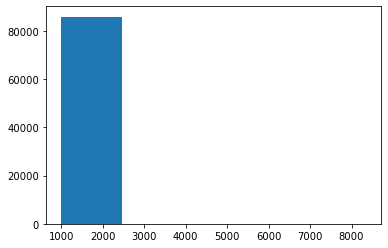

In [12]:
plt.hist(df['LICENSE_CODE'],bins=5)

In [13]:
df['LICENSE_CODE'].value_counts()

1010    50078
1011    10633
1604     2812
1012     2809
1006     2321
        ...  
1058        1
1070        1
1686        1
1473        1
8340        1
Name: LICENSE_CODE, Length: 106, dtype: int64

In [14]:
# Converting it into 3 categories [1010 , 1011 , 0] as "1010" and "1011" are majority 
# and putting remaining in values in separate category "0".

df['LICENSE_CODE'] = np.where((df['LICENSE_CODE'] != 1010) & (df['LICENSE_CODE'] != 1011) , 0, df['LICENSE_CODE'])
df_test['LICENSE_CODE'] = np.where((df_test['LICENSE_CODE'] != 1010) & (df_test['LICENSE_CODE'] != 1011) , 0, df_test['LICENSE_CODE'])

In [15]:
df['LICENSE_CODE']=df['LICENSE_CODE'].astype(object)
df_test['LICENSE_CODE']=df_test['LICENSE_CODE'].astype(object)

In [16]:
dummies_train  = pd.get_dummies(df['LICENSE_CODE'])
dummies_train.drop([0],axis=1,inplace=True)

dummies_test  = pd.get_dummies(df_test['LICENSE_CODE'])
dummies_test.drop([0],axis=1,inplace=True)

df = df.join(dummies_train)
df_test = df_test.join(dummies_test)

df_test.drop(['LICENSE_CODE'],axis=1,inplace=True)
df.drop(['LICENSE_CODE'],axis=1,inplace=True)


### LICENSE_DESCRIPTION

In [17]:
df['LICENSE_DESCRIPTION'].describe()

count                        85895
unique                         106
top       Limited Business License
freq                         50078
Name: LICENSE_DESCRIPTION, dtype: object

In [18]:
df['LICENSE_DESCRIPTION'].value_counts()

Limited Business License                    50078
Home Repair                                 10633
Peddler, non-food                            2812
Home Occupation                              2809
Retail Food Establishment                    2321
                                            ...  
Indoor Special Event                            1
Affiliation                                     1
Airport Pushcart Liquor Midway - Class A        1
Not-For-Profit Club                             1
Motor Vehicle Services License                  1
Name: LICENSE_DESCRIPTION, Length: 106, dtype: int64

In [19]:
# Taking top 2 frequent categories and putting remaining to "Other" category

df['LICENSE_DESCRIPTION'] = np.where((df['LICENSE_DESCRIPTION'] != "Limited Business License") & (df['LICENSE_DESCRIPTION'] != "Home Repair") , "Other", df['LICENSE_DESCRIPTION'])
df_test['LICENSE_DESCRIPTION'] = np.where((df_test['LICENSE_DESCRIPTION'] != "Limited Business License") & (df_test['LICENSE_DESCRIPTION'] != "Home Repair") , "Other", df_test['LICENSE_DESCRIPTION'])

In [20]:
dummies_train  = pd.get_dummies(df['LICENSE_DESCRIPTION'])
dummies_train.drop(['Other'],axis=1,inplace=True)

dummies_test  = pd.get_dummies(df_test['LICENSE_DESCRIPTION'])
dummies_test.drop(['Other'],axis=1,inplace=True)

df = df.join(dummies_train)
df_test = df_test.join(dummies_test)

df_test.drop(['LICENSE_DESCRIPTION'],axis=1,inplace=True)
df.drop(['LICENSE_DESCRIPTION'],axis=1,inplace=True)

### APPLICATION_TYPE

In [21]:
df['APPLICATION_TYPE'].describe()

count     85895
unique        5
top       RENEW
freq      61085
Name: APPLICATION_TYPE, dtype: object

In [22]:
df['APPLICATION_TYPE'].value_counts()

RENEW     61085
ISSUE     23398
C_LOC      1400
C_CAPA        7
C_EXPA        5
Name: APPLICATION_TYPE, dtype: int64

In [23]:
# Taking top 2 frequent categories and putting remaining to "Other" category

df['APPLICATION_TYPE'] = np.where((df['APPLICATION_TYPE'] != "RENEW") & (df['APPLICATION_TYPE'] != "ISSUE") , "Other", df['APPLICATION_TYPE'])
df_test['APPLICATION_TYPE'] = np.where((df_test['APPLICATION_TYPE'] != "RENEW") & (df_test['APPLICATION_TYPE'] != "ISSUE") , "Other", df_test['APPLICATION_TYPE'])

In [24]:
dummies_train  = pd.get_dummies(df['APPLICATION_TYPE'])
dummies_train.drop(['Other'],axis=1,inplace=True)

dummies_test  = pd.get_dummies(df_test['APPLICATION_TYPE'])
dummies_test.drop(['Other'],axis=1,inplace=True)

df = df.join(dummies_train)
df_test = df_test.join(dummies_test)

df_test.drop(['APPLICATION_TYPE'],axis=1,inplace=True)
df.drop(['APPLICATION_TYPE'],axis=1,inplace=True)

### CONDITIONAL_APPROVAL

<AxesSubplot:xlabel='CONDITIONAL_APPROVAL', ylabel='count'>

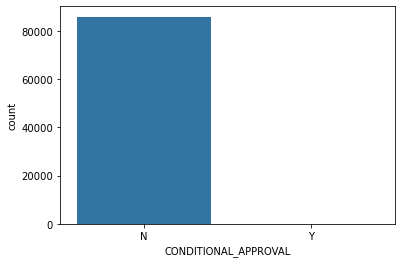

In [25]:
sns.countplot(x="CONDITIONAL_APPROVAL", data=df)

In [26]:
dummies_train  = pd.get_dummies(df['CONDITIONAL_APPROVAL'])
dummies_train.drop(['Y'],axis=1,inplace=True)

dummies_test  = pd.get_dummies(df_test['CONDITIONAL_APPROVAL'])
dummies_test.drop(['Y'],axis=1,inplace=True)

df = df.join(dummies_train)
df_test = df_test.join(dummies_test)

df_test.drop(['CONDITIONAL_APPROVAL'],axis=1,inplace=True)
df.drop(['CONDITIONAL_APPROVAL'],axis=1,inplace=True)

### APPLICATION_CREATED_DATE / APPLICATION_REQUIREMENTS_COMPLETE / PAYMENT_DATE

In [27]:
# Filling missing values with MODE

df['APPLICATION_REQUIREMENTS_COMPLETE']=df['APPLICATION_REQUIREMENTS_COMPLETE'].fillna(df['APPLICATION_REQUIREMENTS_COMPLETE'].mode())
df_test['APPLICATION_REQUIREMENTS_COMPLETE']=df_test['APPLICATION_REQUIREMENTS_COMPLETE'].fillna(df_test['APPLICATION_REQUIREMENTS_COMPLETE'].mode())

In [28]:
# According to problem statement APPLICATION_CREATED_DATE = APPLICATION_REQUIREMENTS_COMPLETE when
# APPLICATION_TYPE = RENEW

df['APPLICATION_CREATED_DATE'].fillna(df.loc[df['RENEW']==1,'APPLICATION_REQUIREMENTS_COMPLETE'],inplace=True)
df_test['APPLICATION_CREATED_DATE'].fillna(df_test.loc[df_test['RENEW']==1,'APPLICATION_REQUIREMENTS_COMPLETE'],inplace=True)

In [29]:
# Assuming missing PAYMENT_DATE is same as APPLICATION_REQUIREMENTS_COMPLETE
# So Filling missing values with APPLICATION_REQUIREMENTS_COMPLETE


df['PAYMENT_DATE'].fillna(df['APPLICATION_REQUIREMENTS_COMPLETE'],inplace=True)
df_test['PAYMENT_DATE'].fillna(df_test['APPLICATION_REQUIREMENTS_COMPLETE'],inplace=True)

In [30]:
# Assuming missing APPLICATION_CREATED_DATE is same as APPLICATION_REQUIREMENTS_COMPLETE
# So Filling missing values with APPLICATION_REQUIREMENTS_COMPLETE


df['APPLICATION_CREATED_DATE'].fillna(df['APPLICATION_REQUIREMENTS_COMPLETE'],inplace=True)
df_test['APPLICATION_CREATED_DATE'].fillna(df_test['APPLICATION_REQUIREMENTS_COMPLETE'],inplace=True)

In [31]:
# Coverting to date time format

df['APPLICATION_CREATED_DATE']=pd.to_datetime(df['APPLICATION_CREATED_DATE'])
df['PAYMENT_DATE']=pd.to_datetime(df['PAYMENT_DATE'])
df['APPLICATION_REQUIREMENTS_COMPLETE']=pd.to_datetime(df['APPLICATION_REQUIREMENTS_COMPLETE'])
df_test['PAYMENT_DATE']=pd.to_datetime(df_test['PAYMENT_DATE'])
df_test['APPLICATION_CREATED_DATE']=pd.to_datetime(df_test['APPLICATION_CREATED_DATE'])
df_test['APPLICATION_REQUIREMENTS_COMPLETE']=pd.to_datetime(df_test['APPLICATION_REQUIREMENTS_COMPLETE'])

In [32]:
# Creating new column for Application_complete_time = APPLICATION_REQUIREMENTS_COMPLETE - APPLICATION_REQUIREMENTS_COMPLETE
# df['Application_complete_time'] denotes time taken to complete application

df['Application_complete_time']=pd.Series(delta.days for delta in (df["APPLICATION_REQUIREMENTS_COMPLETE"] - df["APPLICATION_REQUIREMENTS_COMPLETE"]))
df_test['Application_complete_time']=pd.Series(delta.days for delta in (df_test["APPLICATION_REQUIREMENTS_COMPLETE"] - df_test["APPLICATION_CREATED_DATE"]))

In [33]:
# Creating new column for Payment_time = PAYMENT_DATE - APPLICATION_REQUIREMENTS_COMPLETE 
# df['Payment_time'] denotes time taken to complete payment

df['Payment_time']=pd.Series(delta.days for delta in (df["PAYMENT_DATE"] - df["APPLICATION_REQUIREMENTS_COMPLETE"]))
df_test['Payment_time']=pd.Series(delta.days for delta in (df_test["PAYMENT_DATE"] - df_test["APPLICATION_REQUIREMENTS_COMPLETE"]))

In [34]:
# dropping the above 3 date columns 

df.drop( ['APPLICATION_REQUIREMENTS_COMPLETE','APPLICATION_CREATED_DATE','PAYMENT_DATE'] ,axis=1,inplace=True)
df_test.drop( ['APPLICATION_REQUIREMENTS_COMPLETE','APPLICATION_CREATED_DATE','PAYMENT_DATE'] ,axis=1,inplace=True)

### LICENSE_TERM_START_DATE / LICENSE_TERM_EXPIRATION_DATE / LICENSE_APPROVED_FOR_ISSUANCE / DATE_ISSUED / LICENSE_STATUS_CHANGE_DATE

In [35]:
# Creating Boolean values for other date columns.
# If particular date is present "TRUE" otherwise "FALSE"
# This is done to get information about wheather License is issued/expired/created/changed or not.


df['LICENSE_TERM_START_DATE']=df['LICENSE_TERM_START_DATE'].fillna(0)
df_test['LICENSE_TERM_START_DATE']=df_test['LICENSE_TERM_START_DATE'].fillna(0)
df.loc[(df.LICENSE_TERM_START_DATE  !='0'),'LICENSE_TERM_START_DATE']= 1
df_test.loc[(df.LICENSE_TERM_START_DATE != '0'),'LICENSE_TERM_START_DATE']= 1


df['LICENSE_TERM_EXPIRATION_DATE']=df['LICENSE_TERM_EXPIRATION_DATE'].fillna(0)
df_test['LICENSE_TERM_EXPIRATION_DATE']=df_test['LICENSE_TERM_EXPIRATION_DATE'].fillna(0)
df.loc[(df.LICENSE_TERM_EXPIRATION_DATE  !='0'),'LICENSE_TERM_EXPIRATION_DATE']= 1
df_test.loc[(df.LICENSE_TERM_EXPIRATION_DATE != '0'),'LICENSE_TERM_EXPIRATION_DATE']= 1


df['LICENSE_APPROVED_FOR_ISSUANCE']=df['LICENSE_APPROVED_FOR_ISSUANCE'].fillna(0)
df_test['LICENSE_APPROVED_FOR_ISSUANCE']=df_test['LICENSE_APPROVED_FOR_ISSUANCE'].fillna(0)
df.loc[(df.LICENSE_APPROVED_FOR_ISSUANCE  !='0'),'LICENSE_APPROVED_FOR_ISSUANCE']= 1
df_test.loc[(df.LICENSE_APPROVED_FOR_ISSUANCE != '0'),'LICENSE_APPROVED_FOR_ISSUANCE']= 1


df['DATE_ISSUED']=df['DATE_ISSUED'].fillna(0)
df_test['DATE_ISSUED']=df_test['DATE_ISSUED'].fillna(0)
df.loc[(df.DATE_ISSUED  !='0'),'DATE_ISSUED']= 1
df_test.loc[(df.DATE_ISSUED != '0'),'DATE_ISSUED']= 1


df['LICENSE_STATUS_CHANGE_DATE']=df['LICENSE_STATUS_CHANGE_DATE'].fillna(0)
df_test['LICENSE_STATUS_CHANGE_DATE']=df_test['LICENSE_STATUS_CHANGE_DATE'].fillna(0)
df.loc[(df.LICENSE_STATUS_CHANGE_DATE  !='0'),'LICENSE_STATUS_CHANGE_DATE']= 1
df_test.loc[(df.LICENSE_STATUS_CHANGE_DATE != '0'),'LICENSE_STATUS_CHANGE_DATE']= 1

In [36]:
# Changing datatype

df['LICENSE_STATUS_CHANGE_DATE']=df['LICENSE_STATUS_CHANGE_DATE'].astype(int)
df['LICENSE_TERM_START_DATE']=df['LICENSE_TERM_START_DATE'].astype(int)
df['LICENSE_TERM_EXPIRATION_DATE']=df['LICENSE_TERM_EXPIRATION_DATE'].astype(int)
df['DATE_ISSUED']=df['DATE_ISSUED'].astype(int)
df['LICENSE_APPROVED_FOR_ISSUANCE']=df['LICENSE_APPROVED_FOR_ISSUANCE'].astype(int)


df_test['LICENSE_STATUS_CHANGE_DATE']=df_test['LICENSE_STATUS_CHANGE_DATE'].astype(int)
df_test['LICENSE_TERM_START_DATE']=df_test['LICENSE_TERM_START_DATE'].astype(int)
df_test['LICENSE_TERM_EXPIRATION_DATE']=df_test['LICENSE_TERM_EXPIRATION_DATE'].astype(int)
df_test['DATE_ISSUED']=df_test['DATE_ISSUED'].astype(int)
df_test['LICENSE_APPROVED_FOR_ISSUANCE']=df_test['LICENSE_APPROVED_FOR_ISSUANCE'].astype(int)

In [37]:
train = df.drop( ['ID'] ,axis=1)
test = df_test.drop( ['ID'] ,axis=1)

train.head(7)

,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_APPROVED_FOR_ISSUANCE,DATE_ISSUED,LICENSE_STATUS_CHANGE_DATE,LICENSE_STATUS,IL,1010,1011,Home Repair,Limited Business License,ISSUE,RENEW,N,Application_complete_time,Payment_time
0,1,1,1,1,1,AAI,1,1,0,0,1,0,1,1,0,54
1,1,1,1,1,1,AAC,1,0,0,0,0,0,1,1,0,42
2,1,1,1,1,1,AAI,1,0,1,1,0,1,0,1,0,0
3,1,1,1,1,1,AAI,1,1,0,0,1,1,0,1,0,0
4,1,1,1,1,1,AAI,1,1,0,0,1,0,1,1,0,72
5,1,1,1,1,1,AAI,1,1,0,0,1,1,0,1,0,0
6,1,1,1,1,1,AAI,1,1,0,0,1,0,1,1,0,428


## Model Building

In [38]:
from sklearn.model_selection import train_test_split

X = train.drop(['LICENSE_STATUS'], axis = 1)
Y = train['LICENSE_STATUS']

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 10,stratify=Y)

### RidgeClassifier

In [39]:
from sklearn.linear_model import RidgeClassifier
Ridge_classifier = RidgeClassifier(alpha=10,solver='svd').fit(X_Train, Y_Train)
predictions =Ridge_classifier.predict(X_Test)
print(confusion_matrix(Y_Test,predictions))
print(classification_report(Y_Test,predictions,zero_division=1))

[[ 3762  3788     0     0]
 [ 2164 11686     0     0]
 [    1     0     0     0]
 [   58    15     0     0]]
              precision    recall  f1-score   support

         AAC       0.63      0.50      0.56      7550
         AAI       0.75      0.84      0.80     13850
         REA       1.00      0.00      0.00         1
         REV       1.00      0.00      0.00        73

    accuracy                           0.72     21474
   macro avg       0.85      0.34      0.34     21474
weighted avg       0.71      0.72      0.71     21474



### RidgeClassifierCV

In [40]:
from sklearn.linear_model import RidgeClassifierCV
Ridge_cv = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1,10]).fit(X_Train, Y_Train)
predictions1 =Ridge_cv.predict(X_Test)
print(confusion_matrix(Y_Test,predictions1))
print(classification_report(Y_Test,predictions1,zero_division=1))

[[ 3762  3788     0     0]
 [ 2164 11686     0     0]
 [    1     0     0     0]
 [   58    15     0     0]]
              precision    recall  f1-score   support

         AAC       0.63      0.50      0.56      7550
         AAI       0.75      0.84      0.80     13850
         REA       1.00      0.00      0.00         1
         REV       1.00      0.00      0.00        73

    accuracy                           0.72     21474
   macro avg       0.85      0.34      0.34     21474
weighted avg       0.71      0.72      0.71     21474



### LogisticRegression

In [41]:
from sklearn.linear_model import LogisticRegression
trainedmodel = LogisticRegression(penalty='l2',C=1.0,solver='sag').fit(X_Train,Y_Train)
predictions6 =trainedmodel.predict(X_Test)
print(confusion_matrix(Y_Test,predictions6))
print(classification_report(Y_Test,predictions6,zero_division=1))

[[    0  7541     9     0     0]
 [    0 13841     9     0     0]
 [    0     0     0     0     0]
 [    0     1     0     0     0]
 [    0    73     0     0     0]]
              precision    recall  f1-score   support

         AAC       1.00      0.00      0.00      7550
         AAI       0.65      1.00      0.78     13850
         INQ       0.00      1.00      0.00         0
         REA       1.00      0.00      0.00         1
         REV       1.00      0.00      0.00        73

    accuracy                           0.64     21474
   macro avg       0.73      0.40      0.16     21474
weighted avg       0.77      0.64      0.51     21474



### KNeighborsClassifier

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4,algorithm='auto')
knn.fit(X_Train, Y_Train)
Y_pred = knn.predict(X_Test)
print(confusion_matrix(Y_Test,Y_pred))
print(classification_report(Y_Test,Y_pred,zero_division=1))

[[ 3897  3653     0     0]
 [ 3315 10535     0     0]
 [    0     1     0     0]
 [   42    31     0     0]]
              precision    recall  f1-score   support

         AAC       0.54      0.52      0.53      7550
         AAI       0.74      0.76      0.75     13850
         REA       1.00      0.00      0.00         1
         REV       1.00      0.00      0.00        73

    accuracy                           0.67     21474
   macro avg       0.82      0.32      0.32     21474
weighted avg       0.67      0.67      0.67     21474



### DecisionTreeClassifier

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
DT_clf = DecisionTreeClassifier(random_state=10,max_features=10,max_depth=3)
DT_clf.fit(X_Train, Y_Train)
predictionDT = DT_clf.predict(X_Test)
print(confusion_matrix(Y_Test,predictionDT))
print(classification_report(Y_Test,predictionDT,zero_division=1))

[[ 3767  3783     0     0]
 [ 2168 11682     0     0]
 [    1     0     0     0]
 [   58    15     0     0]]
              precision    recall  f1-score   support

         AAC       0.63      0.50      0.56      7550
         AAI       0.75      0.84      0.80     13850
         REA       1.00      0.00      0.00         1
         REV       1.00      0.00      0.00        73

    accuracy                           0.72     21474
   macro avg       0.85      0.34      0.34     21474
weighted avg       0.71      0.72      0.71     21474



### GradientBoostingClassifier

In [44]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
# learning_rates = [0.05, 0.1, 0.25,]
# for learning_rate in learning_rates:
#     gb = GradientBoostingClassifier(n_estimators=900, learning_rate = learning_rate, max_features=10, max_depth = 2, random_state = 10)
#     gb.fit(X_Train, Y_Train)
#     print("Learning rate: ", learning_rate)
#     print("Accuracy score (training): {0:.3f}".format(gb.score(X_Train, Y_Train)))
#     print("Accuracy score (validation): {0:.3f}".format(gb.score(X_Test, Y_Test)))
#     print()

### GradientBoostingClassifier with best learning rate

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
learning_rates = 0.05
gb = GradientBoostingClassifier(n_estimators=900, learning_rate = learning_rates, max_features=10, max_depth = 2, random_state = 10)
gb.fit(X_Train, Y_Train)
predictiongb = gb.predict(X_Test)
print(confusion_matrix(Y_Test,predictiongb))
print(classification_report(Y_Test,predictiongb,zero_division=1))

[[ 3714  3836     0     0]
 [ 2071 11779     0     0]
 [    1     0     0     0]
 [   58    15     0     0]]
              precision    recall  f1-score   support

         AAC       0.64      0.49      0.55      7550
         AAI       0.75      0.85      0.80     13850
         REA       1.00      0.00      0.00         1
         REV       1.00      0.00      0.00        73

    accuracy                           0.72     21474
   macro avg       0.85      0.34      0.34     21474
weighted avg       0.71      0.72      0.71     21474



### BaggingClassifier

In [46]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(n_neighbors = 4,algorithm='auto'),max_samples=0.5, max_features=0.5,random_state=10).fit(X_Train, Y_Train)
prediction_bag = bagging.predict(X_Test)
print(confusion_matrix(Y_Test,prediction_bag))
print(classification_report(Y_Test,prediction_bag,zero_division=1))

[[  562  6988     0     0]
 [  254 13596     0     0]
 [    1     0     0     0]
 [    8    65     0     0]]
              precision    recall  f1-score   support

         AAC       0.68      0.07      0.13      7550
         AAI       0.66      0.98      0.79     13850
         REA       1.00      0.00      0.00         1
         REV       1.00      0.00      0.00        73

    accuracy                           0.66     21474
   macro avg       0.83      0.26      0.23     21474
weighted avg       0.67      0.66      0.56     21474



### RandomForestClassifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
trainedforest = RandomForestClassifier(n_estimators=800,random_state=42,max_features=0.8,max_depth=10).fit(X_Train,Y_Train)
predictionforest = trainedforest.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest,zero_division=1))

[[ 3735  3815     0     0]
 [ 2089 11761     0     0]
 [    1     0     0     0]
 [   56    17     0     0]]
              precision    recall  f1-score   support

         AAC       0.64      0.49      0.56      7550
         AAI       0.75      0.85      0.80     13850
         REA       1.00      0.00      0.00         1
         REV       1.00      0.00      0.00        73

    accuracy                           0.72     21474
   macro avg       0.85      0.34      0.34     21474
weighted avg       0.71      0.72      0.71     21474



### AdaBoostClassifier

In [48]:
from sklearn.ensemble import AdaBoostClassifier
clf_ada = AdaBoostClassifier(n_estimators=900, random_state=0)
clf_ada.fit(X_Train,Y_Train)
prediction_ada = trainedforest.predict(X_Test)
print(confusion_matrix(Y_Test,prediction_ada))
print(classification_report(Y_Test,prediction_ada,zero_division=1))

[[ 3735  3815     0     0]
 [ 2089 11761     0     0]
 [    1     0     0     0]
 [   56    17     0     0]]
              precision    recall  f1-score   support

         AAC       0.64      0.49      0.56      7550
         AAI       0.75      0.85      0.80     13850
         REA       1.00      0.00      0.00         1
         REV       1.00      0.00      0.00        73

    accuracy                           0.72     21474
   macro avg       0.85      0.34      0.34     21474
weighted avg       0.71      0.72      0.71     21474



### xgboost

In [49]:
import xgboost
classifier_xgb=xgboost.XGBClassifier(n_estimators=900)
classifier_xgb.fit(X_Train, Y_Train)
prediction_xg0 = classifier_xgb.predict(X_Test)
print(confusion_matrix(Y_Test,prediction_xg0))
print(classification_report(Y_Test,prediction_xg0,zero_division=1))


[20:00:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[ 3686  3864     0     0]
 [ 2078 11772     0     0]
 [    1     0     0     0]
 [   54    19     0     0]]
              precision    recall  f1-score   support

         AAC       0.63      0.49      0.55      7550
         AAI       0.75      0.85      0.80     13850
         REA       1.00      0.00      0.00         1
         REV       1.00      0.00      0.00        73

    accuracy                           0.72     21474
   macro avg       0.85      0.33      0.34     21474
weighted avg       0.71      0.72      0.71     21474



In [52]:
predictions_Final =classifier_xgb.predict(test)
submission = pd.DataFrame({
        "ID": df_test["ID"],
        "LICENSE STATUS": predictions_Final
    })
submission.to_csv('submissions.csv', index=False)